In [4]:
import numpy as np
import cv2

In [5]:
img = np.zeros((512,512,3), np.uint8)
cv2.line(img, (0,0), (511,511), (255,0,0),5)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ..., 
       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,

In [7]:
cv2.imshow('image', img)

error: /tmp/build/80754af9/opencv_1512687413662/work/modules/highgui/src/window.cpp:611: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function cvShowImage


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

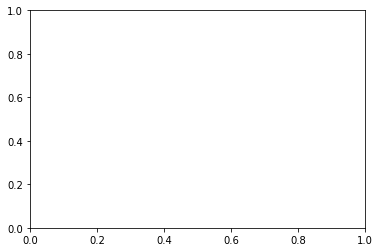

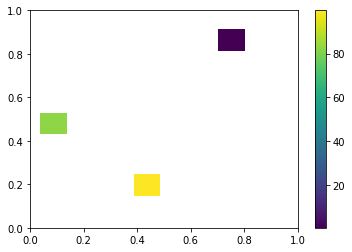

In [25]:
fig, ax = plt.subplots()
resolution = 50
N = 3
x = np.random.rand(N)
y = np.random.rand(N)

height = 0.1
width = 0.1
patches = []
for x1, y1 in zip(x,y):
    rectangle = Rectangle((x1, y1), width=width, height=height)
    patches.append(rectangle)
    
p = PatchCollection(patches)

ax.add_collection(p)
colors = 100*np.random.rand(len(patches))
p.set_array(np.array(colors))
fig.colorbar(p, ax=ax)

plt.show()

In [26]:
import pddl_functions, ff
import copy
domain, problem = pddl_functions.parse('blocks-domain.pddl', '../FF-v2.3/blocks1.pddl')



Parsing domain blocks-domain.pddl
Parsing problem ../FF-v2.3/blocks1.pddl


In [27]:
problem.initialstate

In [34]:
for arg in problem.objects.args:
    print(arg.arg_name)

b1
b2
b3
b4
b5


In [89]:
height = width = 0.2
def get_objects(problem):
    return [arg.arg_name for arg in problem.objects.args]
def generate_start_position(problem):
    objects = get_objects(problem)
    y_pos = 0
    starting_positions = []
    x_pos = 0.2
    for o in objects:
        starting_positions.append((x_pos, y_pos))
        x_pos += width*2
    return starting_positions
    

In [49]:

posns = generate_start_position(problem)

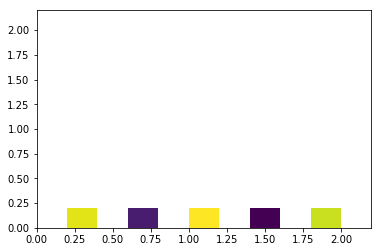

In [52]:
def plot_blocks(posns, colours):
    fig, ax = plt.subplots()
    resolution = 50

    height = width = 0.2

    patches = []
    for x1, y1 in posns:
        rectangle = Rectangle((x1, y1), width=width, height=height)
        patches.append(rectangle)

    p = PatchCollection(patches)

    ax.add_collection(p)
    p.set_array(np.array(colors))
    plt.xlim(0, 2.2)
    plt.ylim(0, 2.2)
    plt.show()

colours = 100*np.random.rand(len(patches))
plot_blocks(posns, colours)

In [69]:
f1 = problem.initialstate[0]
p1 = f1.get_predicates(1)[0]
p1.args.args[0].arg_name

'b1'

In [104]:
def get_predicates(object_, state):
    predicates = []
    for formula in state:
        predicate = formula.get_predicates(1)[0]
        if object_ in [arg.arg_name for arg in predicate.args.args]:
            predicates.append(predicate)
    return predicates

In [85]:
for f in get_predicates('b1', problem.initialstate):
    print(f.name)

['b1']
['b2']
['b3']
['b4']
['b5']
['b1']
['b2']
['b3']
['b4']
['b5']
[]
['b1']
['b3']
['b4']
on-table
clear
blue


In [142]:
def place_objects(objects, state, y_start):
    y_pos = {o:-1 for o in objects}
    x_pos = {o:x for o, (x, y) in zip(objects, y_start)}
    predicates = {o:{p.name:p for p in get_predicates(o, state)} for o in objects}
    for o in objects:
        if 'on-table' in predicates[o].keys():
            y_pos[o] = 0
    while -1 in y_pos.values():
        for o in objects:
            if 'on' in predicates[o].keys():
                x, y = map(lambda x: x.arg_name, predicates[o]['on'].args.args)
                if y_pos[y] != -1:
                    y_pos[x] = y_pos[y] + height
                    x_pos[x] = x_pos[y]
    return [(x_pos[o], y_pos[o]) for o in objects]

In [106]:
place_objects(get_objects(problem), problem.initialstate)

b1
b2
b3
b4
b5


In [99]:
for f in problem.initialstate:
    print(f.asPDDL())

(on-table b1)
(on-table b2)
(on-table b3)
(on-table b4)
(on-table b5)
(clear b1)
(clear b2)
(clear b3)
(clear b4)
(clear b5)
(arm-empty )
(blue b1)
(red b3)
(in-tower b4)


In [113]:
import pddl_functions, ff
import copy
def create_action_dict(domain):
    return {action.name:action for action in domain.actions}

result = ff.ff('blocks-domain.pddl', '../FF-v2.3/blocks1.pddl')
actions = ff.get_actions(result)

domain_actions = create_action_dict(domain)

state = problem.initialstate
for action, action_arguments in actions:
    #try:
    state = pddl_functions.apply_action(action_arguments, domain_actions[action], state)
    #except AttributeError:
    #    print(action)

In [115]:
problem2 = copy.deepcopy(problem)

In [118]:
problem2.initialstate = state

In [143]:
positions = place_objects(get_objects(problem), problem2.initialstate, posns)

In [125]:
posns

[(0.2, 0),
 (0.6000000000000001, 0),
 (1.0, 0),
 (1.4, 0),
 (1.7999999999999998, 0)]

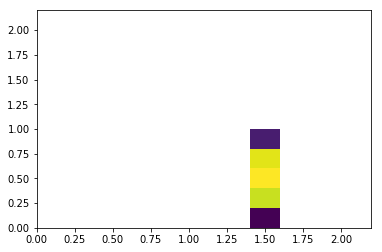

In [144]:
plot_blocks(positions, colours)

In [141]:
positions

[(1.0, -0.8), (0.2, -0.8), (1.4, 0.4), (1.4, 0), (1.4, 0.2)]